# COVID19 AND PNEUMONIA DIAGNOSIS USING CHEST X-RAYS 

## Problem Statement: 
- #### This project is developed to diagnose the chest X-Rays images data and build a Deep Learning Model to detect COVID19 or PNEUMONIA in patients and ensuring medical person to identify the disease using an android app and perform treatment as early as possible.

- #### Dataset: https://www.kaggle.com/datasets/sachinkumar413/covid-pneumonia-normal-chest-xray-imageses

### Contents in the dataset
- #### COVID: 1626 images
- #### NORMAL: 1802 images
- #### PNEUMONIA: 1800 images

#### Importing Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 20

#### Import data into tensorflow dataset object
- ##### image_dataset_from_directory api to load all images in tensorflow dataset

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Xray_Images//",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 5228 files belonging to 3 classes.


#### Name of classes

In [4]:
class_names = dataset.class_names
class_names

['COVID', 'NORMAL', 'PNEUMONIA']

#### Number of batches

In [5]:
len(dataset) # batch size is 68

164

#### Tensor data of all the images in the first batch along with the labels

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch)
    print(label_batch)

tf.Tensor(
[[[[4.00000000e+00 4.00000000e+00 4.00000000e+00]
   [7.43750000e+00 7.43750000e+00 7.43750000e+00]
   [1.25937500e+01 1.25937500e+01 1.25937500e+01]
   ...
   [3.35312500e+01 3.35312500e+01 3.35312500e+01]
   [3.05937500e+01 3.05937500e+01 3.05937500e+01]
   [2.20000000e+01 2.20000000e+01 2.20000000e+01]]

  [[3.14062500e+00 3.14062500e+00 3.14062500e+00]
   [7.31665039e+00 7.31665039e+00 7.31665039e+00]
   [1.32517090e+01 1.32517090e+01 1.32517090e+01]
   ...
   [3.01474609e+01 3.01474609e+01 3.01474609e+01]
   [2.51823730e+01 2.51823730e+01 2.51823730e+01]
   [2.02812500e+01 2.02812500e+01 2.02812500e+01]]

  [[3.76562500e+00 3.76562500e+00 3.76562500e+00]
   [6.08862305e+00 6.08862305e+00 6.08862305e+00]
   [1.18281250e+01 1.18281250e+01 1.18281250e+01]
   ...
   [2.98210449e+01 2.98210449e+01 2.98210449e+01]
   [2.28732910e+01 2.28732910e+01 2.28732910e+01]
   [1.92343750e+01 1.92343750e+01 1.92343750e+01]]

  ...

  [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0

#### Converting the tensor labels into numpy array

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 2 2 0 1 2 0 1 2 2 1 1 2 1 0 2 2 2 1 0 1 1 2 0 0 1 1 0 0 1 1 2]


#### Converting the tensor images into numpy array

In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[  0.          0.          0.       ]
  [  0.          0.          0.       ]
  [  0.          0.          0.       ]
  ...
  [  0.          0.          0.       ]
  [  0.          0.          0.       ]
  [  0.          0.          0.       ]]

 [[  0.          0.          0.       ]
  [  0.          0.          0.       ]
  [  0.          0.          0.       ]
  ...
  [  0.          0.          0.       ]
  [  0.          0.          0.       ]
  [  0.          0.          0.       ]]

 [[  0.          0.          0.       ]
  [  0.          0.          0.       ]
  [  0.          0.          0.       ]
  ...
  [  0.          0.          0.       ]
  [  0.          0.          0.       ]
  [  0.          0.          0.       ]]

 ...

 [[  0.          0.          0.       ]
  [  0.          0.          0.       ]
  [  0.          0.          0.       ]
  ...
  [159.6753    159.6753    159.6753   ]
  [ 34.764404   34.764404   34.764404 ]
  [  0.          0.          0.       ]]

 [

#### Visualizing the first image from the first batch

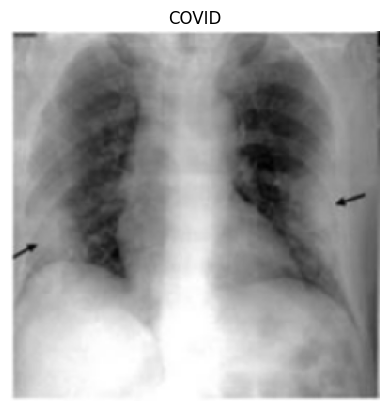

In [9]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')

#### Visualizing all the images from the dataset

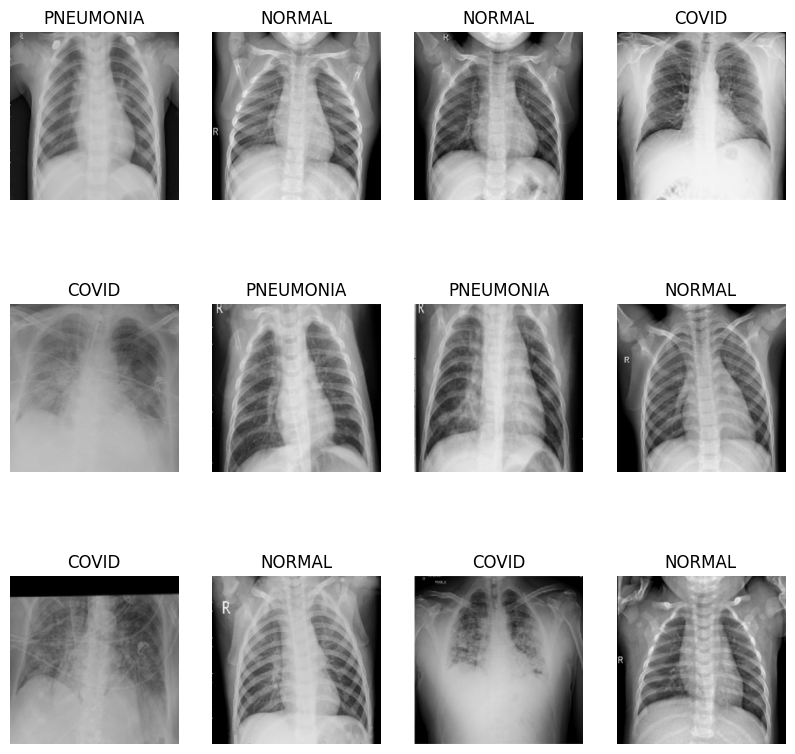

In [10]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

#### Splitting the data into 80% training data, 10% validation data and 10% test data

In [11]:
train_size = 0.8
len(dataset)*train_size

131.20000000000002

In [12]:
train_ds = dataset.take(54)
len(train_ds)

54

In [13]:
test_ds = dataset.skip(54)
len(test_ds)

110

In [14]:
val_data = 0.1
len(dataset)*val_data

16.400000000000002

In [15]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [16]:
def get_data_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1):
    shuffle=True 
    shuffle_size=1000
    ds_size = len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split *ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [17]:
train_ds, val_ds, test_ds = get_data_partitions_tf(dataset)

In [18]:
len(train_ds)

131

In [19]:
len(val_ds)

16

In [20]:
len(test_ds)

17

#### On top of the returned caching shuffling and prefetching is done, Optimization is done for increasing the performance of the training

In [21]:

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

#### Preprocessing and Scaling the numpy arrays for images by creating layers

In [22]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

#### Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

In [23]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    #layers.experimental.preprocessing.RandomRotation(0.2),
])

### Building CNN model Architecture
- #### We use a CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation

In [24]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),

])

model.build(input_shape=input_shape)

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

### Compiling the Model

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
131/131 [==============================] - 2257s 16s/step - loss: 0.6715 - accuracy: 0.6781 - val_loss: 0.8170 - val_accuracy: 0.6797
Epoch 2/20
131/131 [==============================] - 753s 6s/step - loss: 0.3155 - accuracy: 0.8830 - val_loss: 0.3177 - val_accuracy: 0.8809
Epoch 3/20
131/131 [==============================] - 684s 5s/step - loss: 0.2294 - accuracy: 0.9195 - val_loss: 0.3995 - val_accuracy: 0.8809
Epoch 4/20
131/131 [==============================] - 731s 6s/step - loss: 0.1813 - accuracy: 0.9396 - val_loss: 0.2629 - val_accuracy: 0.9004
Epoch 5/20
131/131 [==============================] - 821s 6s/step - loss: 0.1635 - accuracy: 0.9406 - val_loss: 0.2834 - val_accuracy: 0.8945
Epoch 6/20
131/131 [==============================] - 689s 5s/step - loss: 0.1437 - accuracy: 0.9492 - val_loss: 0.3179 - val_accuracy: 0.8945
Epoch 7/20
131/131 [==============================] - 714s 5s/step - loss: 0.1418 - accuracy: 0.9501 - val_loss: 0.4216 - val_accuracy: 0.85

In [28]:
scores = model.evaluate(test_ds)

17/17 [==============================] - 199s 1s/step - loss: 0.2890 - accuracy: 0.9320


You can see above that we get 100.00% accuracy for our test dataset. This is considered to be a pretty good accuracy

In [29]:
scores

[0.28901106119155884, 0.9319853186607361]

### Plotting the Accuracy and Loss Curves

In [30]:
history

In [31]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 131}

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
history.history['accuracy']

[0.6780920624732971,
 0.8830296993255615,
 0.9194630980491638,
 0.9395973086357117,
 0.9405561089515686,
 0.9491850137710571,
 0.9501438140869141,
 0.958053708076477,
 0.9570949077606201,
 0.9657238721847534,
 0.9690795540809631,
 0.9719558954238892,
 0.9748322367668152,
 0.976030707359314,
 0.9789069890975952,
 0.9774688482284546,
 0.9863374829292297,
 0.9815436005592346,
 0.9853787422180176,
 0.98298180103302]

In [34]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

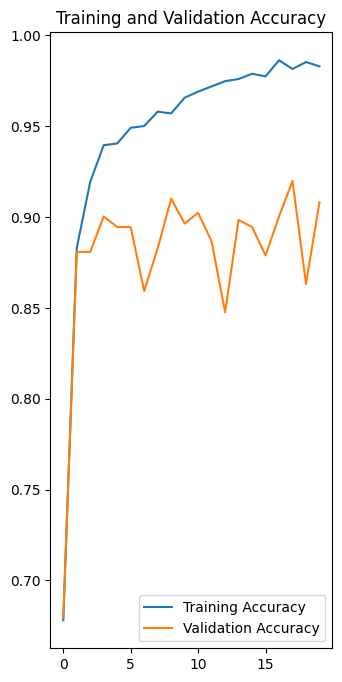

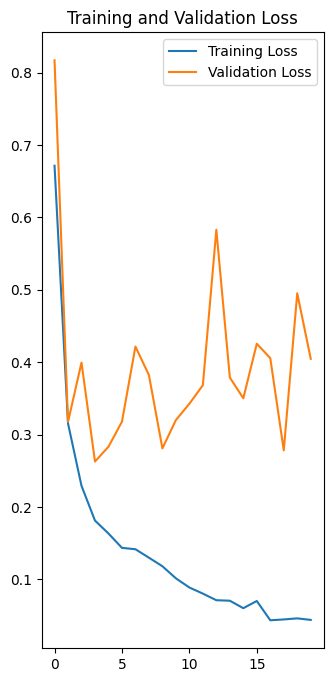

In [35]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), accuracy, label='Training Accuracy')
plt.plot(range(EPOCHS), val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

[[[59.       59.       59.      ]
  [59.859375 59.859375 59.859375]
  [66.125    66.125    66.125   ]
  ...
  [38.53125  38.53125  38.53125 ]
  [36.296875 36.296875 36.296875]
  [32.       32.       32.      ]]

 [[57.28125  57.28125  57.28125 ]
  [62.571777 62.571777 62.571777]
  [62.98291  62.98291  62.98291 ]
  ...
  [42.277588 42.277588 42.277588]
  [35.80005  35.80005  35.80005 ]
  [33.71875  33.71875  33.71875 ]]

 [[60.0625   60.0625   60.0625  ]
  [62.78833  62.78833  62.78833 ]
  [62.87549  62.87549  62.87549 ]
  ...
  [42.436035 42.436035 42.436035]
  [38.565918 38.565918 38.565918]
  [35.53125  35.53125  35.53125 ]]

 ...

 [[28.       28.       28.      ]
  [28.       28.       28.      ]
  [28.       28.       28.      ]
  ...
  [21.351807 21.351807 21.351807]
  [21.348877 21.348877 21.348877]
  [20.234375 20.234375 20.234375]]

 [[28.       28.       28.      ]
  [28.       28.       28.      ]
  [28.       28.       28.      ]
  ...
  [19.234375 19.234375 19.234375]
  [2

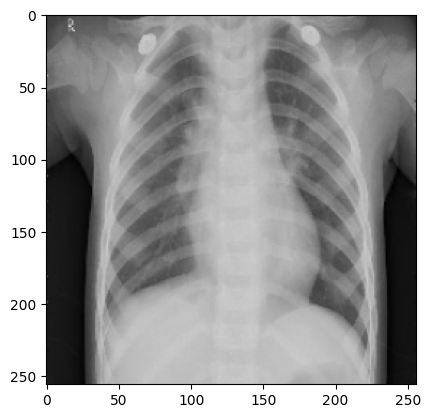

In [36]:
for images_batch, labels_batch in test_ds.take(1):
    print(image_batch[0].numpy())
    plt.imshow(image_batch[0].numpy().astype('uint8'))

### Run prediction on a sample image

first image to predict
first image actual label:  PNEUMONIA
1/1 [==============================] - 7s 7s/step
first image predicted label:  PNEUMONIA


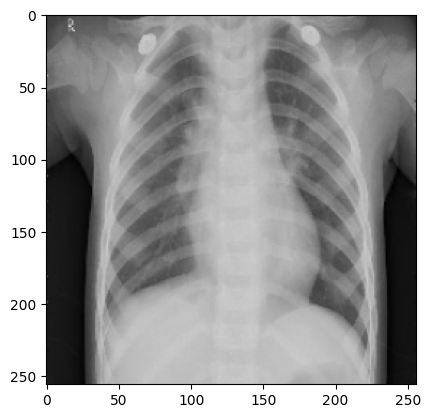

In [37]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print('first image to predict')
    plt.imshow(first_image)
    print('first image actual label: ',class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print('first image predicted label: ',class_names[np.argmax(batch_prediction[0])])

#### Function for inference

In [38]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

####  Inference on few sample images

1/1 [==============================] - 0s 57ms/step


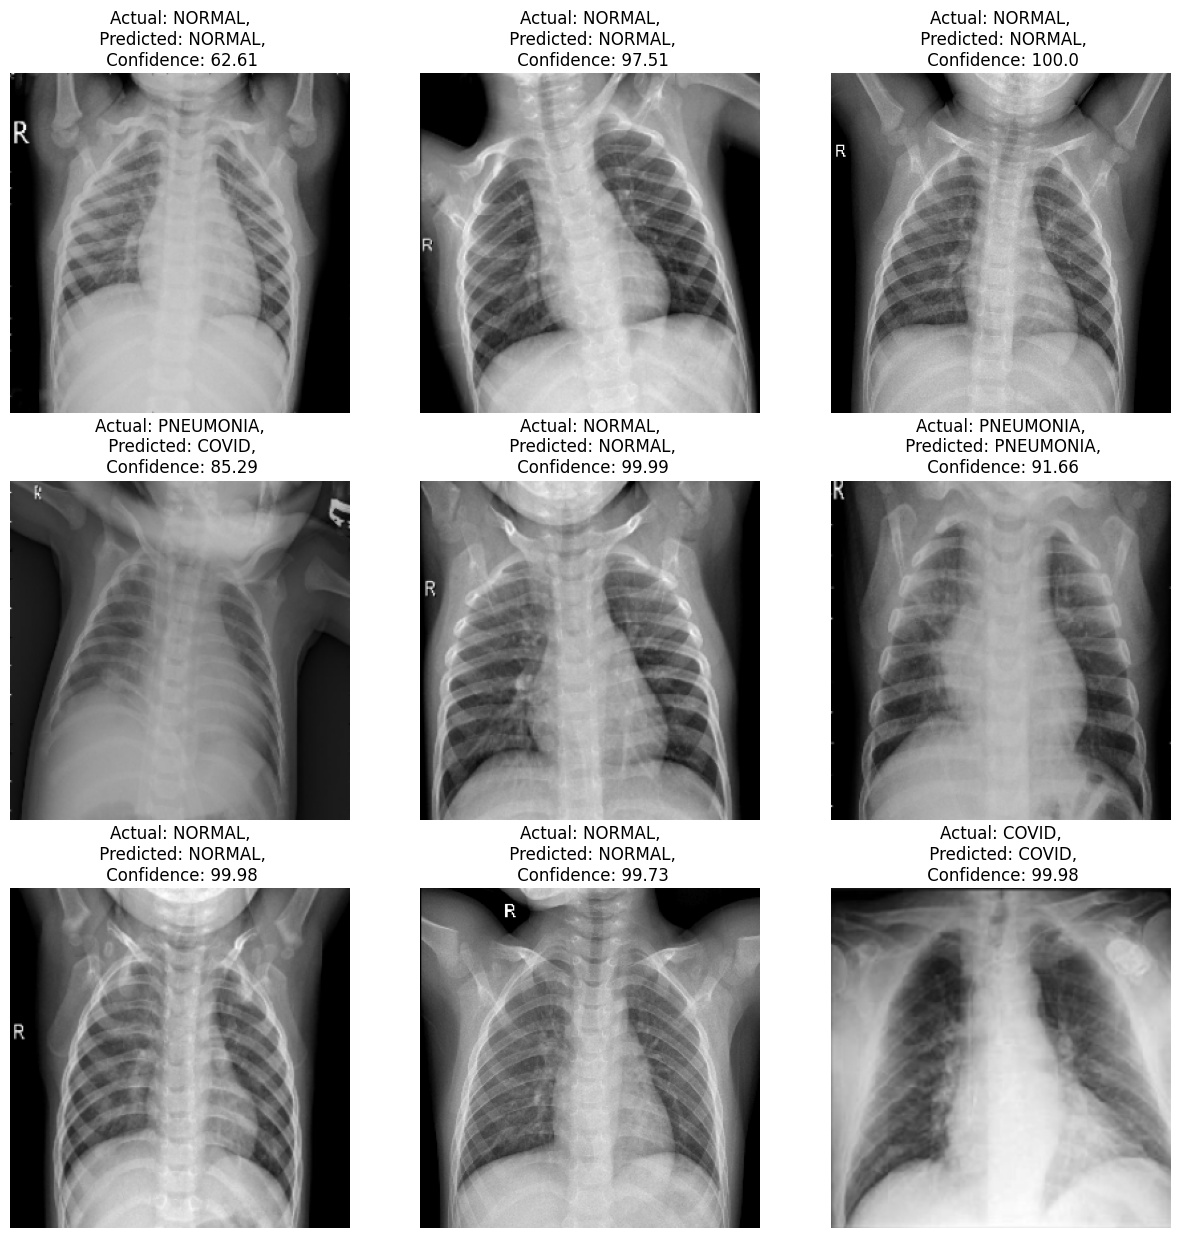

In [39]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class , confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}")
        plt.axis('off')

### Save the model

In [40]:
model.save("../xrays.h5")

In [42]:
import os
model_version = 1
model.save(f"../saved_models/{model_version}")

INFO:tensorflow:Assets written to: ../saved_models/1\assets


INFO:tensorflow:Assets written to: ../saved_models/1\assets


In [43]:
import os
model_version = 2
model.save(f"../saved_models/{model_version}")

INFO:tensorflow:Assets written to: ../saved_models/2\assets


INFO:tensorflow:Assets written to: ../saved_models/2\assets


In [44]:
import os
model_version = 3
model.save(f"../saved_models/{model_version}")

INFO:tensorflow:Assets written to: ../saved_models/3\assets


INFO:tensorflow:Assets written to: ../saved_models/3\assets
